In [646]:
#pip install pandas

In [647]:
import pandas as pd

In [648]:
data1 = pd.read_csv('datasets\col_mat_nuw_output.csv',header=None)
data2 = pd.read_csv('datasets\kan_output.csv',header=None)
data3 = pd.read_csv('datasets\mon_kur_jaf_output.csv',header=None)

In [649]:
data = pd.concat([data1,data2,data3])

In [650]:
column_names = ["HCHO Reading", "Location", "Current Date", "Next Date"]
data.columns = column_names

In [651]:
data.head()

,HCHO Reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06


In [652]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12782 entries, 0 to 5477
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HCHO Reading  7918 non-null   float64
 1   Location      12782 non-null  object 
 2   Current Date  12782 non-null  object 
 3   Next Date     12782 non-null  object 
dtypes: float64(1), object(3)
memory usage: 499.3+ KB


In [653]:
# Count of duplicates
data.duplicated().value_counts()

False    12782
Name: count, dtype: int64

In [654]:
# Get the sum of the null values in each column
data.isnull().sum()

HCHO Reading    4864
Location           0
Current Date       0
Next Date          0
dtype: int64

In [655]:
data = data.dropna(subset=['HCHO Reading'])

In [656]:
data['Location'].unique()

array(['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper',
       'Kandy Proper', 'Bibile, Monaragala', 'Kurunegala Proper',
       'Jaffna Proper'], dtype=object)

In [657]:
colombo_data = data[data['Location'] == 'Colombo Proper']
colombo_data.isnull().sum()

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [658]:
deniyaya_data = data[data['Location'] == 'Deniyaya, Matara']
deniyaya_data.isnull().sum()

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [659]:
nuwaraeliya_data = data[data['Location'] == 'Nuwara Eliya Proper']
nuwaraeliya_data.isnull().sum()

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [660]:
kandy_data = data[data['Location'] == 'Kandy Proper']
kandy_data.isnull().sum()

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [661]:
bibile_data = data[data['Location'] == 'Bibile, Monaragala']
bibile_data.isnull().sum()

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [662]:
kurunegala_data = data[data['Location'] == 'Kurunegala Proper']
kurunegala_data.isnull().sum()

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [663]:
jaffna_data = data[data['Location'] == 'Jaffna Proper']
jaffna_data.isnull().sum()

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [664]:
data.isnull().sum()

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [665]:
#pip install matplotlib

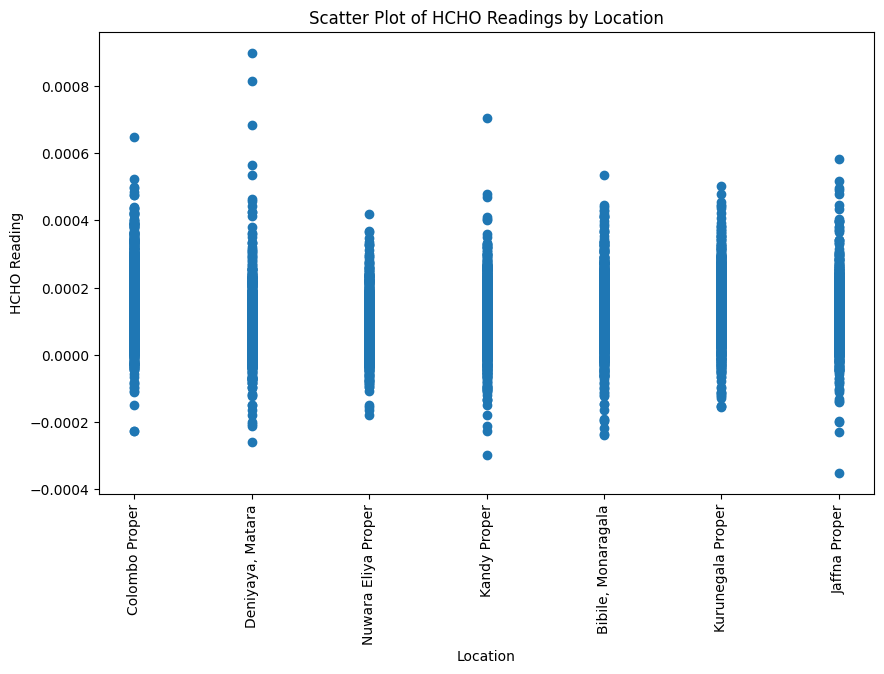

In [666]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['Location'], data['HCHO Reading'])
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('HCHO Reading')
plt.title('Scatter Plot of HCHO Readings by Location')
plt.show()

In [667]:
#pip install seaborn

In [668]:
import seaborn as sns

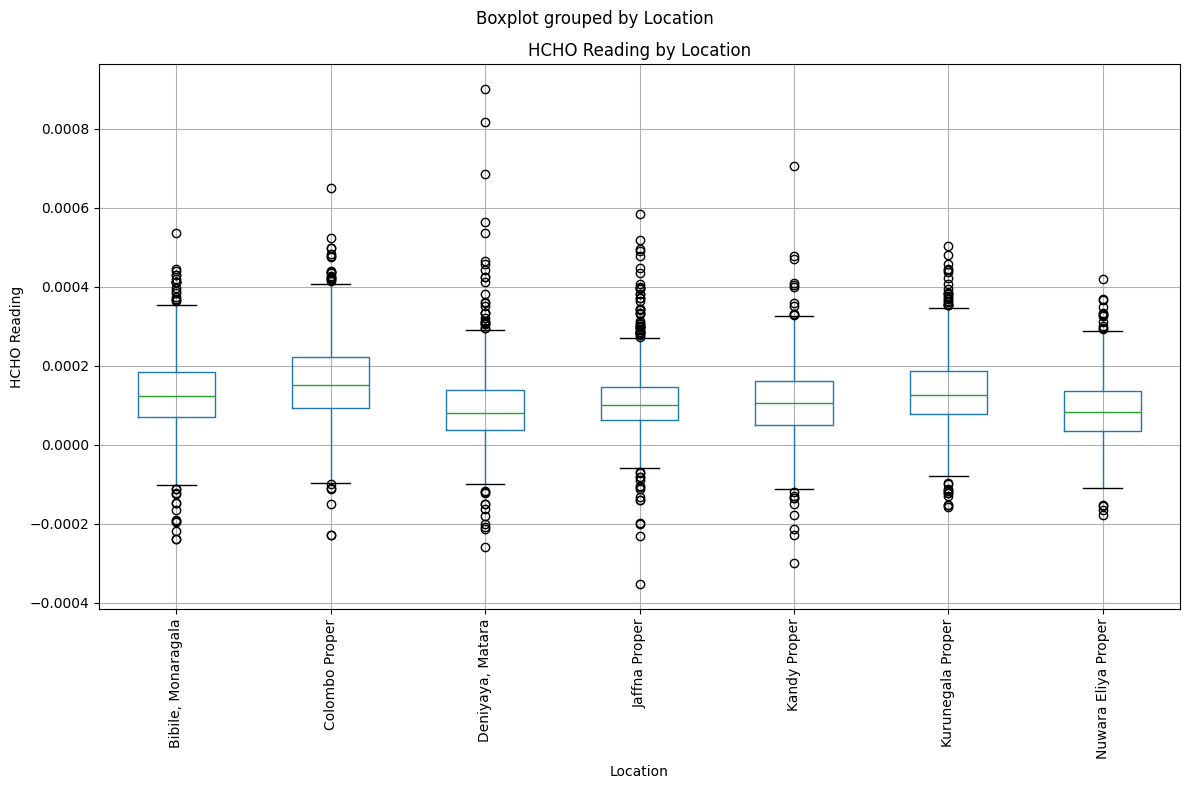

In [669]:
fig, ax = plt.subplots(figsize=(12, 8))
data.boxplot(column='HCHO Reading', by='Location', ax=ax)

ax.set_title('HCHO Reading by Location')
ax.set_xlabel('Location')
ax.set_ylabel('HCHO Reading')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Axes: xlabel='HCHO Reading'>

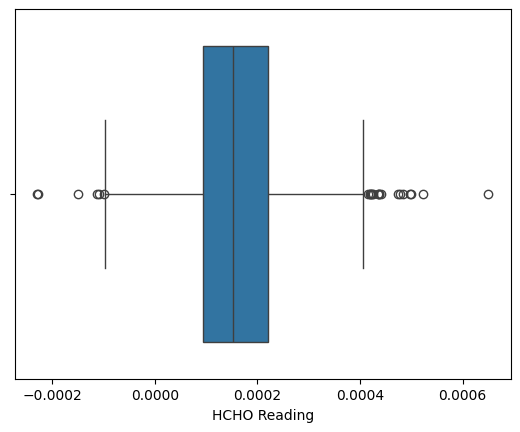

In [670]:
sns.boxplot(x='HCHO Reading', data=colombo_data)

In [671]:
import numpy as np

In [672]:
# Calculate 1st Quartile and 3rd quartile
Q1 = colombo_data['HCHO Reading'].quantile(0.25)
Q3 = colombo_data['HCHO Reading'].quantile(0.75)

# Calculate IQR 
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (colombo_data['HCHO Reading'] < lower_bound) | (colombo_data['HCHO Reading'] > upper_bound)

# Replace outlier values with the mean of non-outlier values
colombo_data.loc[bounds, 'HCHO Reading'] = np.mean(colombo_data.loc[~bounds, 'HCHO Reading'])

<Axes: xlabel='HCHO Reading'>

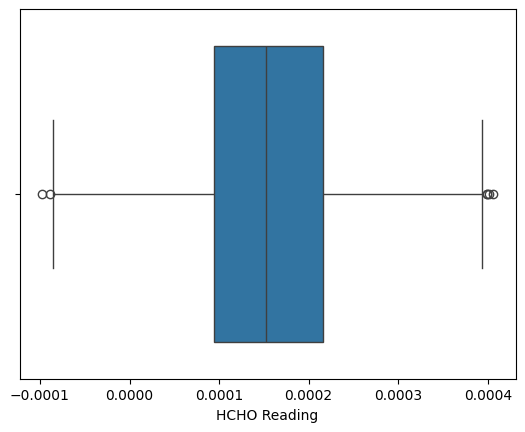

In [673]:
sns.boxplot(x='HCHO Reading', data=colombo_data)

In [674]:
# Calculate 1st Quartile and 3rd quartile
Q1 = bibile_data['HCHO Reading'].quantile(0.25)
Q3 = bibile_data['HCHO Reading'].quantile(0.75)

# Calculate IQR 
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (bibile_data['HCHO Reading'] < lower_bound) | (bibile_data['HCHO Reading'] > upper_bound)

# Replace outlier values with the mean of non-outlier values
bibile_data.loc[bounds, 'HCHO Reading'] = np.mean(bibile_data.loc[~bounds, 'HCHO Reading'])

<Axes: xlabel='HCHO Reading'>

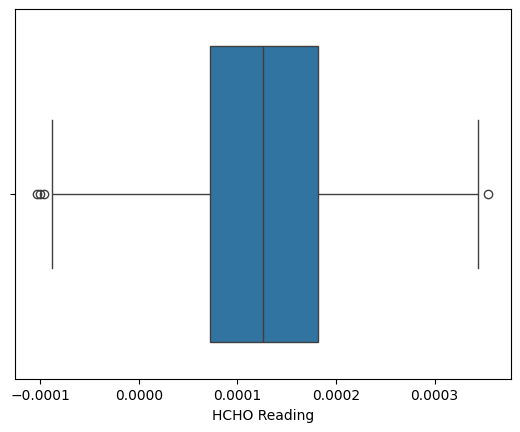

In [675]:
sns.boxplot(x='HCHO Reading', data=bibile_data)

In [676]:
# Calculate 1st Quartile and 3rd quartile
Q1 = deniyaya_data['HCHO Reading'].quantile(0.25)
Q3 = deniyaya_data['HCHO Reading'].quantile(0.75)

# Calculate IQR 
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (deniyaya_data['HCHO Reading'] < lower_bound) | (deniyaya_data['HCHO Reading'] > upper_bound)

# Replace outlier values with the mean of non-outlier values
deniyaya_data.loc[bounds, 'HCHO Reading'] = np.mean(deniyaya_data.loc[~bounds, 'HCHO Reading'])

<Axes: xlabel='HCHO Reading'>

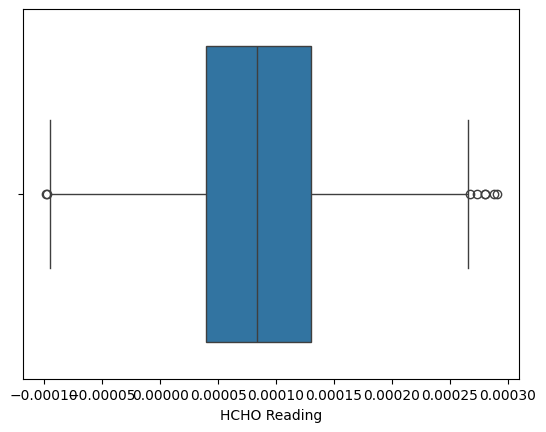

In [677]:
sns.boxplot(x='HCHO Reading', data=deniyaya_data)

In [678]:
# Calculate 1st Quartile and 3rd quartile
Q1 = jaffna_data['HCHO Reading'].quantile(0.25)
Q3 = jaffna_data['HCHO Reading'].quantile(0.75)

# Calculate IQR 
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (jaffna_data['HCHO Reading'] < lower_bound) | (jaffna_data['HCHO Reading'] > upper_bound)

# Replace outlier values with the mean of non-outlier values
jaffna_data.loc[bounds, 'HCHO Reading'] = np.mean(jaffna_data.loc[~bounds, 'HCHO Reading'])

<Axes: xlabel='HCHO Reading'>

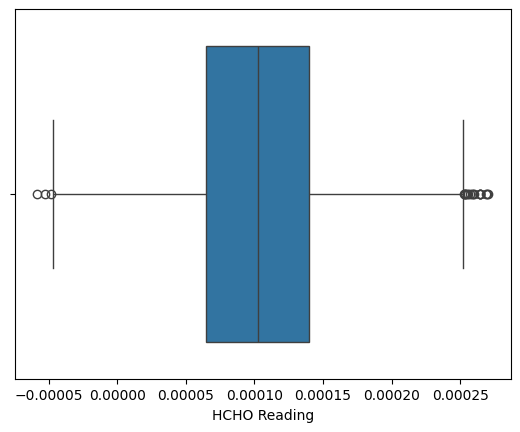

In [679]:
sns.boxplot(x='HCHO Reading', data=jaffna_data)

In [680]:
# Calculate 1st Quartile and 3rd quartile
Q1 = kurunegala_data['HCHO Reading'].quantile(0.25)
Q3 = kurunegala_data['HCHO Reading'].quantile(0.75)

# Calculate IQR 
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (kurunegala_data['HCHO Reading'] < lower_bound) | (kurunegala_data['HCHO Reading'] > upper_bound)

# Replace outlier values with the mean of non-outlier values
kurunegala_data.loc[bounds, 'HCHO Reading'] = np.mean(kurunegala_data.loc[~bounds, 'HCHO Reading'])

<Axes: xlabel='HCHO Reading'>

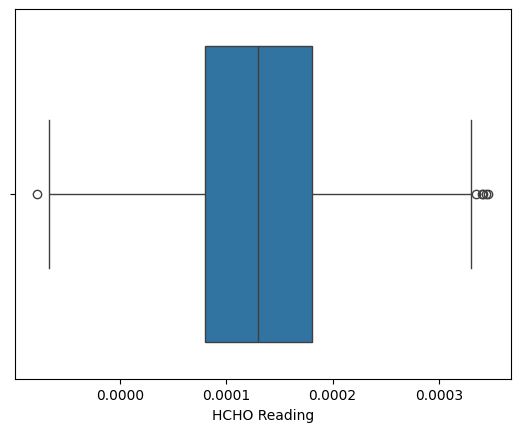

In [681]:
sns.boxplot(x='HCHO Reading', data=kurunegala_data)

In [682]:
# Calculate 1st Quartile and 3rd quartile
Q1 = nuwaraeliya_data['HCHO Reading'].quantile(0.25)
Q3 = nuwaraeliya_data['HCHO Reading'].quantile(0.75)

# Calculate IQR 
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (nuwaraeliya_data['HCHO Reading'] < lower_bound) | (nuwaraeliya_data['HCHO Reading'] > upper_bound)

# Replace outlier values with the mean of non-outlier values
nuwaraeliya_data.loc[bounds, 'HCHO Reading'] = np.mean(nuwaraeliya_data.loc[~bounds, 'HCHO Reading'])

<Axes: xlabel='HCHO Reading'>

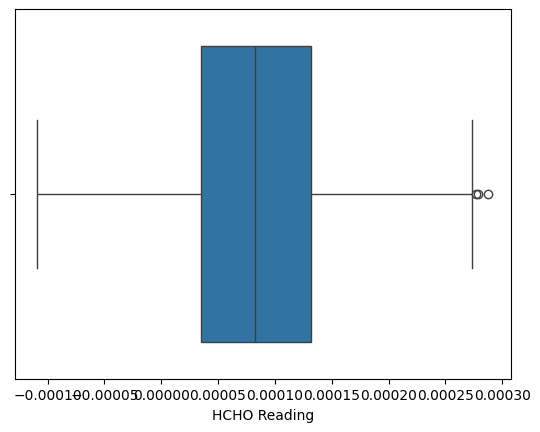

In [683]:
sns.boxplot(x='HCHO Reading', data=nuwaraeliya_data)

In [684]:
# Calculate 1st Quartile and 3rd quartile
Q1 = kandy_data['HCHO Reading'].quantile(0.25)
Q3 = kandy_data['HCHO Reading'].quantile(0.75)

# Calculate IQR 
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (kandy_data['HCHO Reading'] < lower_bound) | (kandy_data['HCHO Reading'] > upper_bound)

# Replace outlier values with the mean of non-outlier values
kandy_data.loc[bounds, 'HCHO Reading'] = np.mean(kandy_data.loc[~bounds, 'HCHO Reading'])

<Axes: xlabel='HCHO Reading'>

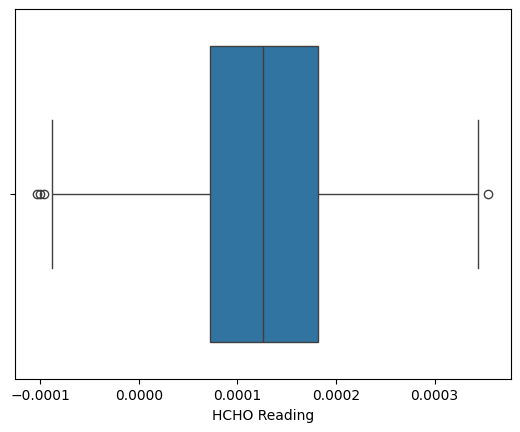

In [685]:
sns.boxplot(x='HCHO Reading', data=bibile_data)

In [686]:
combined_data = pd.concat([nuwaraeliya_data,colombo_data,deniyaya_data,kandy_data, kurunegala_data,bibile_data,jaffna_data])
combined_data = combined_data.reset_index(drop=True)

In [687]:
combined_data['Current Date'] = pd.to_datetime(combined_data['Current Date'])
combined_data['Next Date'] = pd.to_datetime(combined_data['Next Date'])

In [688]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7918 entries, 0 to 7917
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO Reading  7918 non-null   float64       
 1   Location      7918 non-null   object        
 2   Current Date  7918 non-null   datetime64[ns]
 3   Next Date     7918 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 247.6+ KB


In [689]:
combined_data.head()

,HCHO Reading,Location,Current Date,Next Date
0,0.000191,Nuwara Eliya Proper,2019-01-03,2019-01-04
1,0.000051,Nuwara Eliya Proper,2019-01-04,2019-01-05
2,0.000065,Nuwara Eliya Proper,2019-01-05,2019-01-06
3,0.000090,Nuwara Eliya Proper,2019-01-06,2019-01-07
4,0.000041,Nuwara Eliya Proper,2019-01-07,2019-01-08


In [690]:
combined_data['Location'].unique()

array(['Nuwara Eliya Proper', 'Colombo Proper', 'Deniyaya, Matara',
       'Kandy Proper', 'Kurunegala Proper', 'Bibile, Monaragala',
       'Jaffna Proper'], dtype=object)

In [691]:
combined_data['Location'] = combined_data['Location'].replace('Nuwara Eliya Proper', 'NUWARA ELIYA')
combined_data['Location'] = combined_data['Location'].replace('Colombo Proper', 'COLOMBO')
combined_data['Location'] = combined_data['Location'].replace('Kandy Proper', 'KANDY')
combined_data['Location'] = combined_data['Location'].replace('Kurunegala Proper', 'KURUNEGALA')
combined_data['Location'] = combined_data['Location'].replace('Jaffna Proper', 'JAFFNA')
combined_data['Location'] = combined_data['Location'].replace('Deniyaya, Matara', 'DENIYAYA, MATARA')
combined_data['Location'] = combined_data['Location'].replace('Bibile, Monaragala', 'BIBILE, MONARAGALA')

In [692]:
combined_data.head()

,HCHO Reading,Location,Current Date,Next Date
0,0.000191,NUWARA ELIYA,2019-01-03,2019-01-04
1,0.000051,NUWARA ELIYA,2019-01-04,2019-01-05
2,0.000065,NUWARA ELIYA,2019-01-05,2019-01-06
3,0.000090,NUWARA ELIYA,2019-01-06,2019-01-07
4,0.000041,NUWARA ELIYA,2019-01-07,2019-01-08


In [693]:
stats_by_city = combined_data.groupby('Location')['HCHO Reading'].agg(['mean', 'median', 'std'])
overall_stats = combined_data['HCHO Reading'].agg(['mean', 'median', 'std'])


<Figure size 1000x600 with 0 Axes>

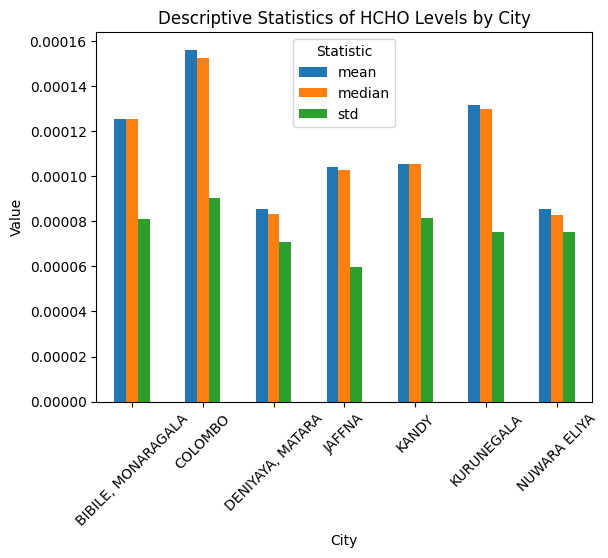

In [694]:
# Plot descriptive statistics for each city
plt.figure(figsize=(10, 6))
stats_by_city.plot(kind='bar')
plt.title('Descriptive Statistics of HCHO Levels by City')
plt.xlabel('City')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Statistic')
plt.show()

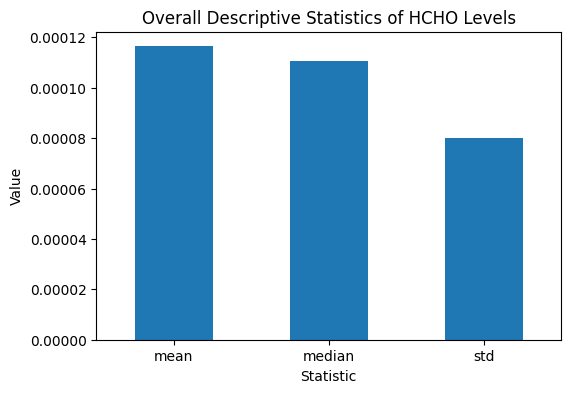

In [695]:
# Plot overall descriptive statistics
plt.figure(figsize=(6, 4))
overall_stats.plot(kind='bar')
plt.title('Overall Descriptive Statistics of HCHO Levels')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.show()

In [696]:
combined_data.to_csv('datasets/combined_data.csv', index=False)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7918 entries, 0 to 7917
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO Reading  7918 non-null   float64       
 1   Location      7918 non-null   object        
 2   Current Date  7918 non-null   datetime64[ns]
 3   Next Date     7918 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 247.6+ KB


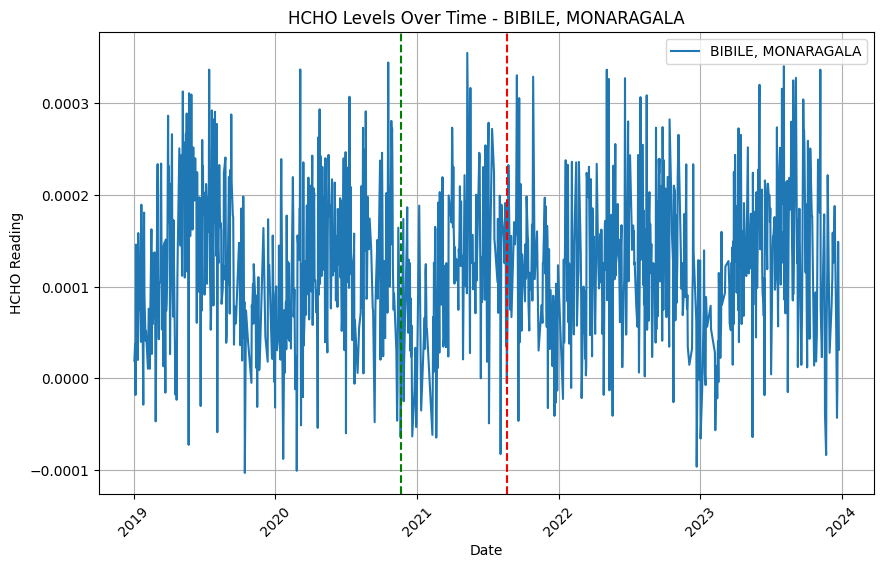

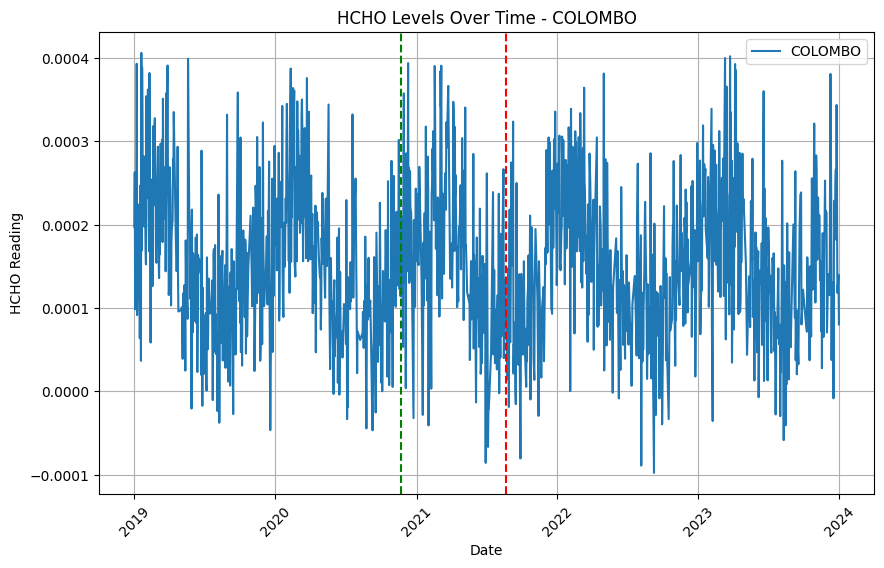

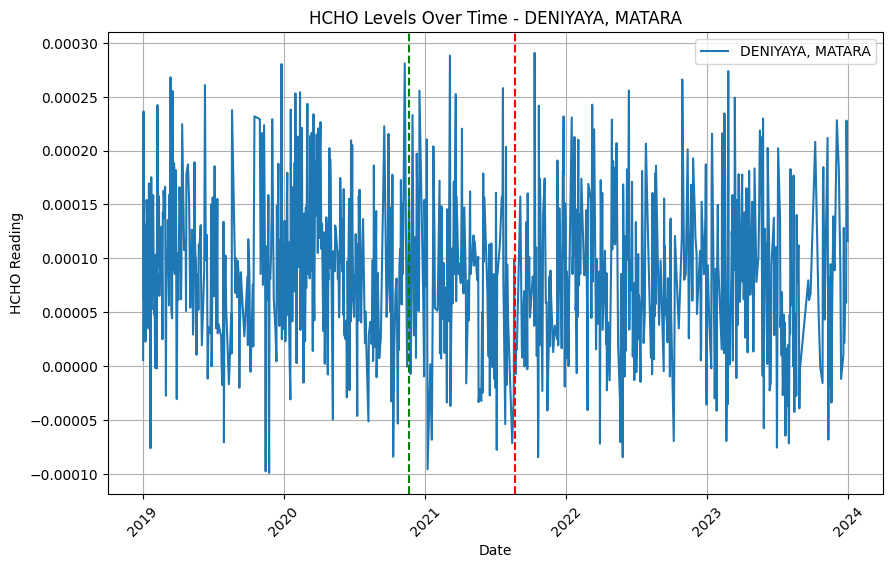

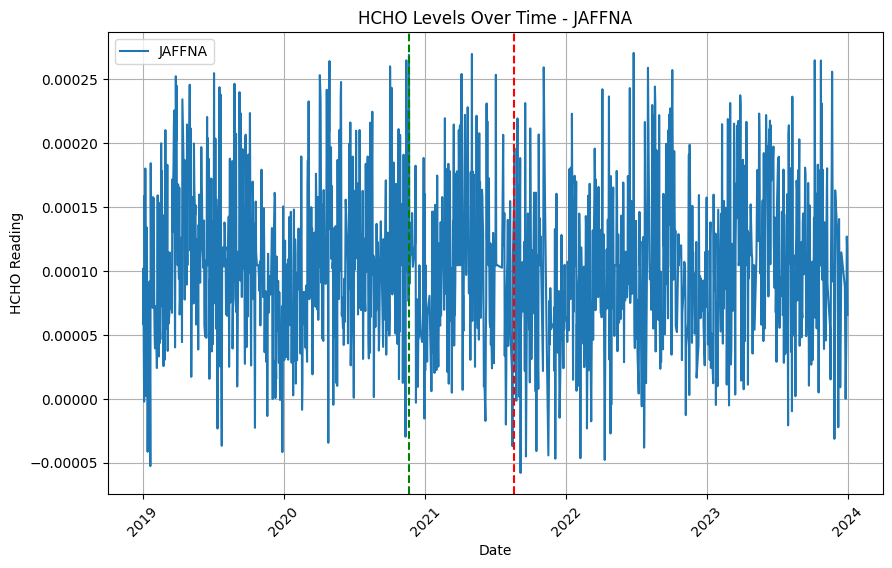

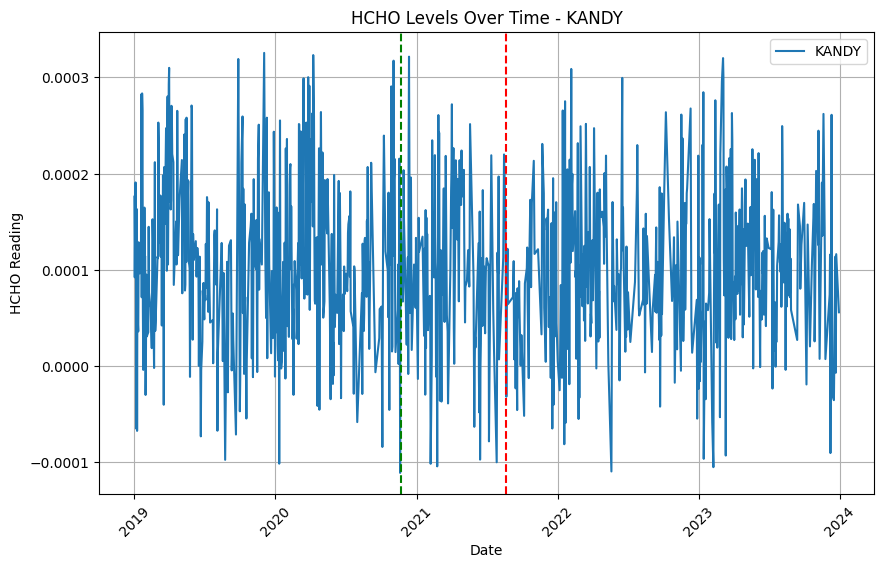

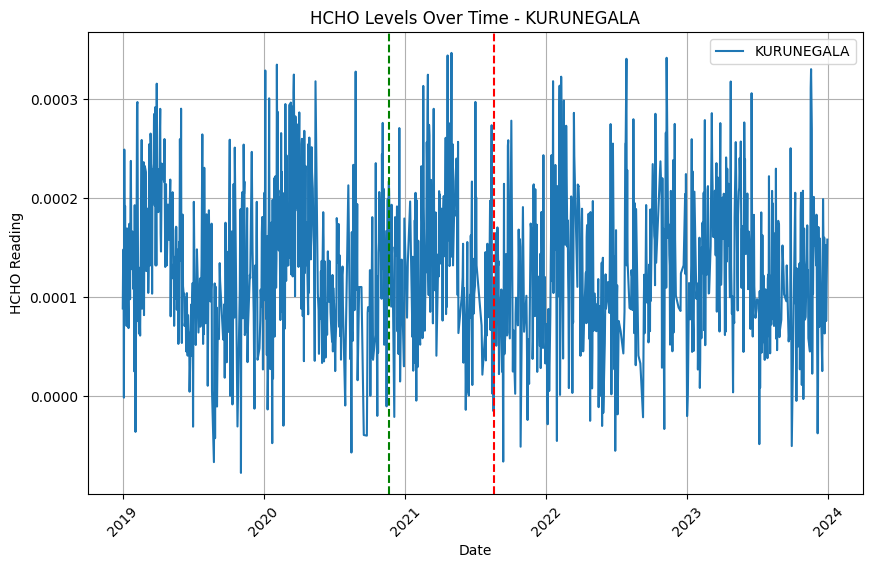

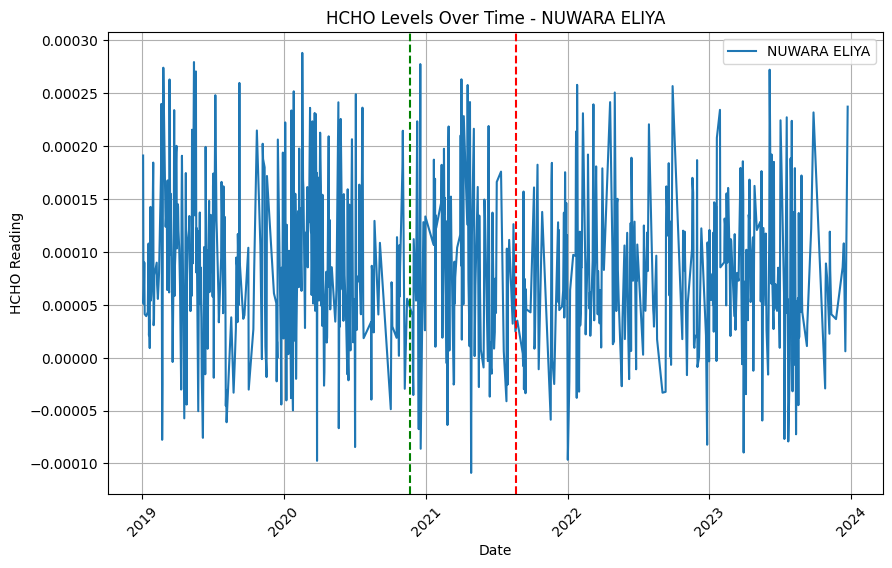

In [697]:
for location, data in combined_data.groupby('Location'):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Current Date'], data['HCHO Reading'], label=location)
    
    # Set plot title and labels
    plt.title(f'HCHO Levels Over Time - {location}')
    plt.xlabel('Date')
    plt.ylabel('HCHO Reading')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.axvline(x=pd.to_datetime('2021-08-20'), color='red', linestyle='--', label='Start of Lockdown')
    plt.axvline(x=pd.to_datetime('2020-11-21'), color='green', linestyle='--', label='End of Lockdown')
    
    plt.show()

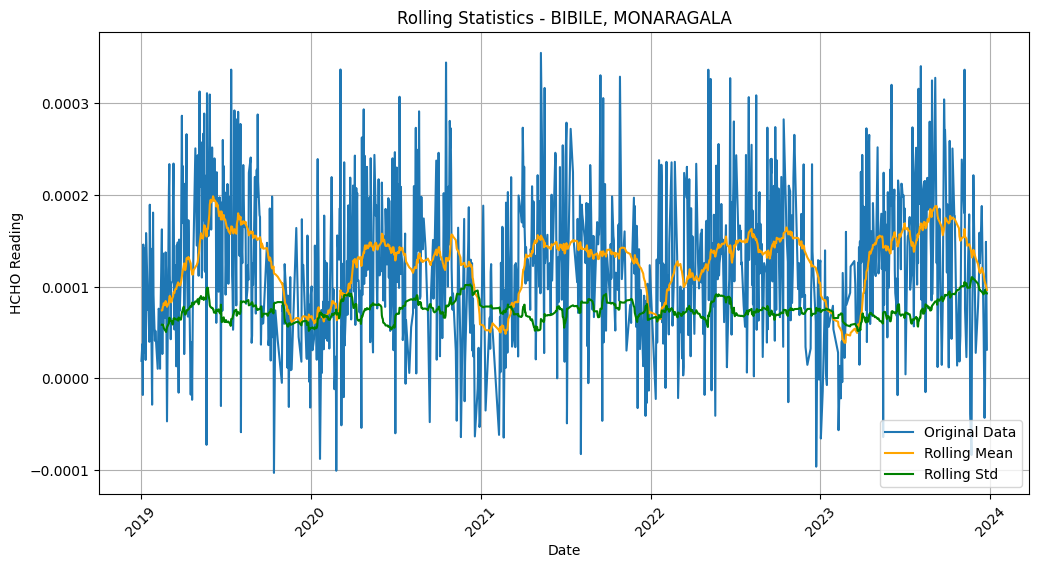

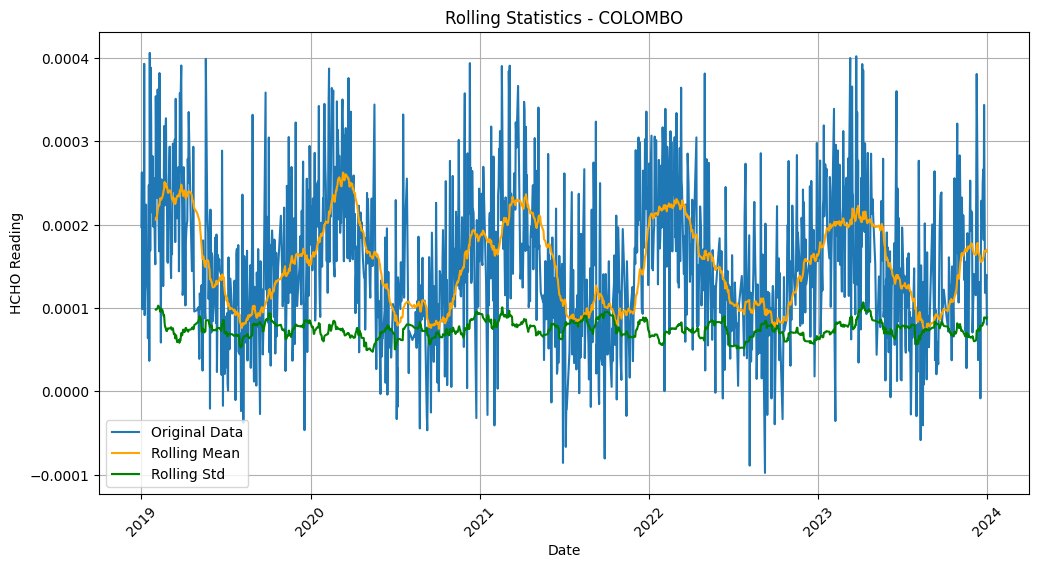

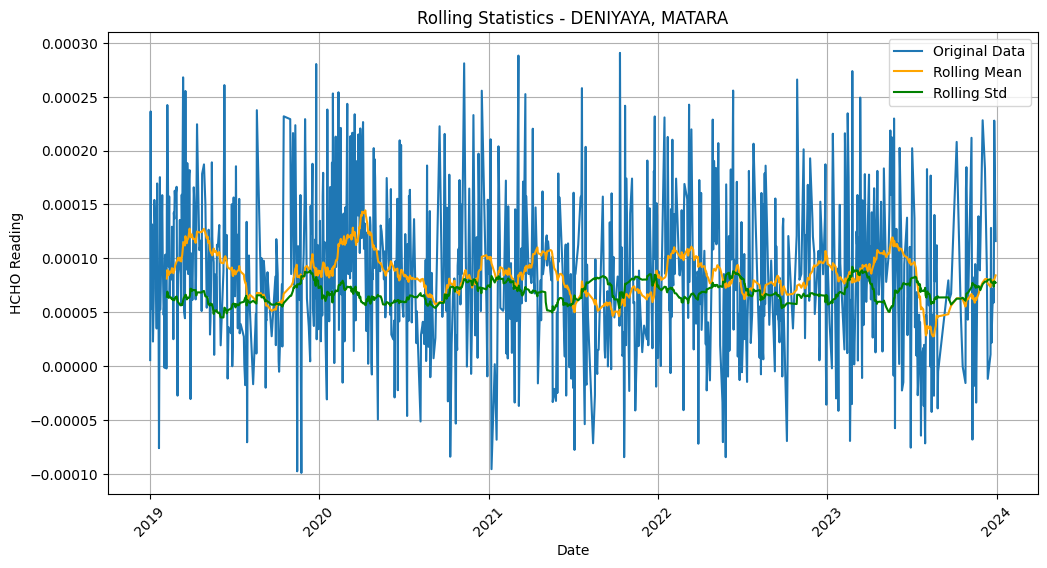

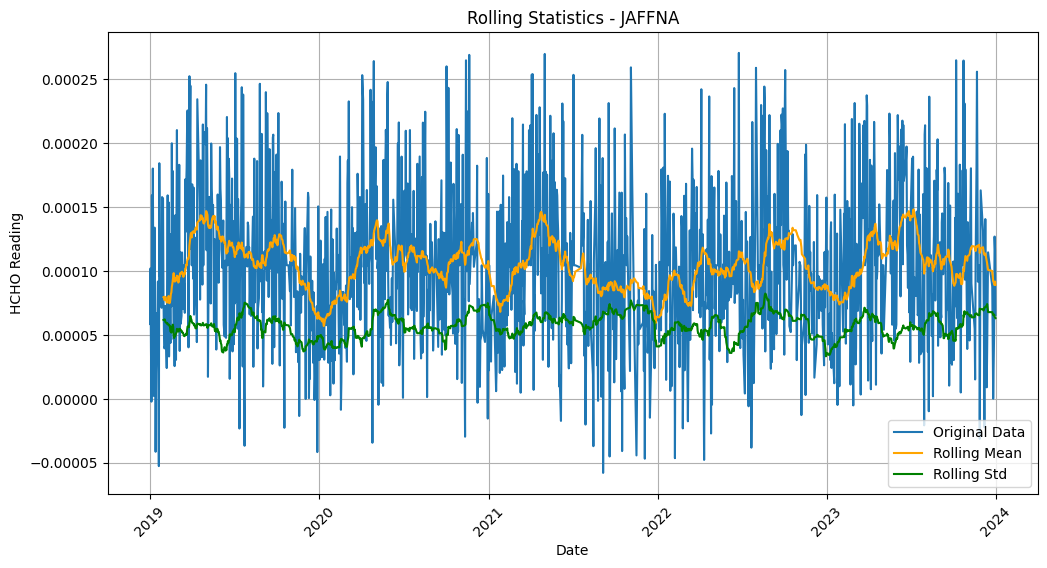

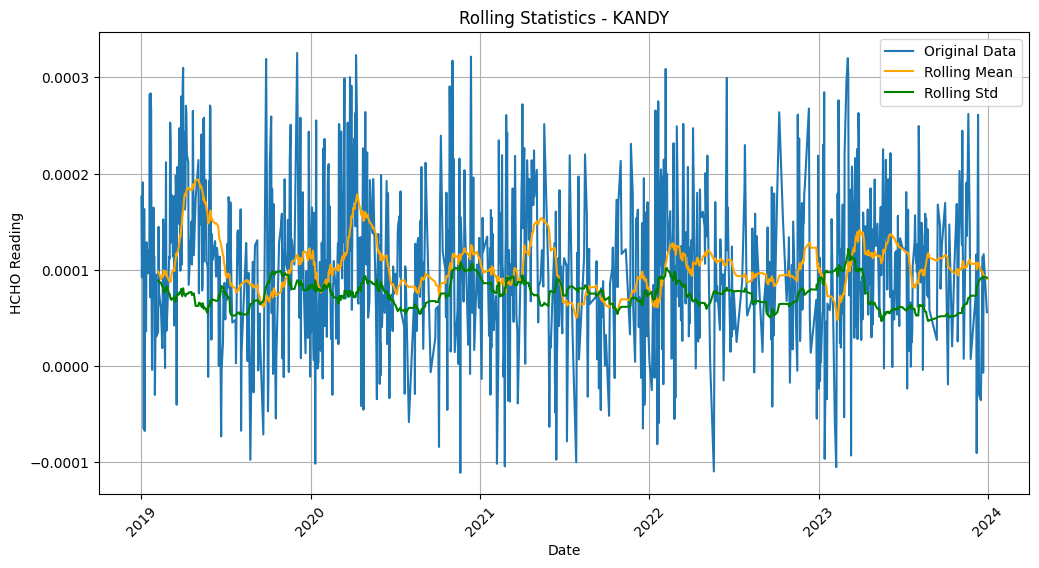

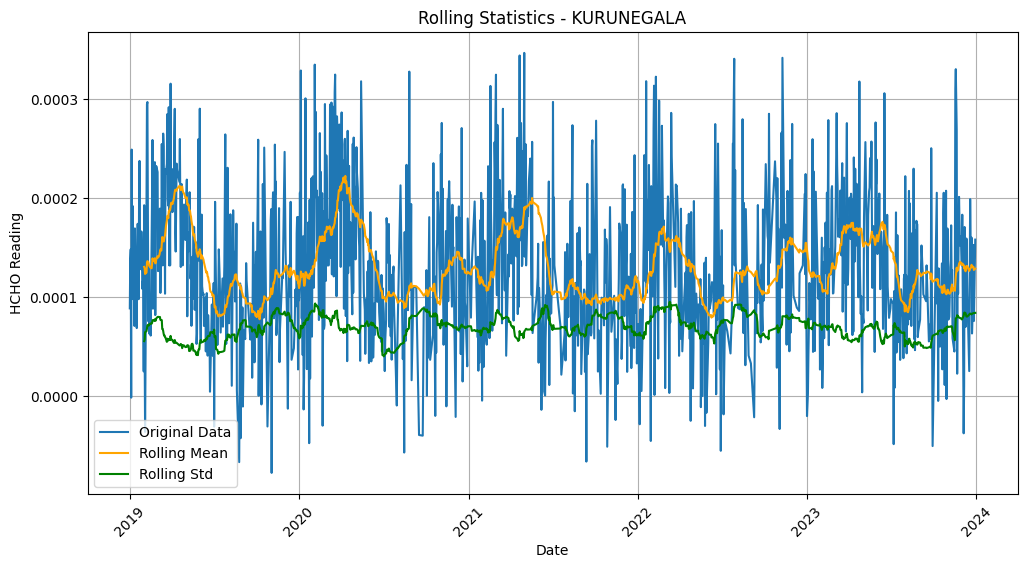

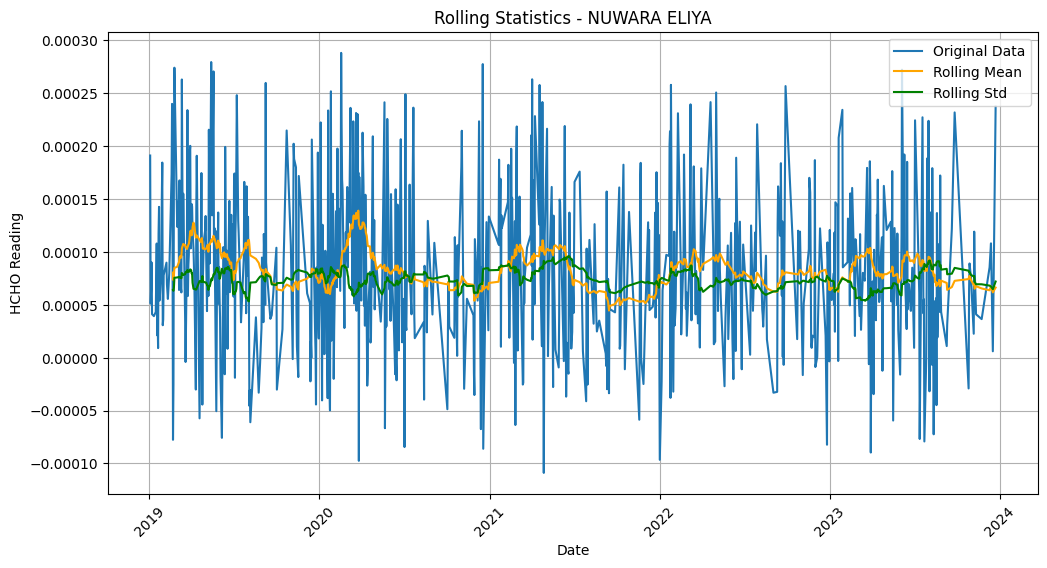

In [698]:
# Calculate rolling mean and standard deviation for each city
for location, data in combined_data.groupby('Location'):
    rolling_mean = data['HCHO Reading'].rolling(window=30).mean()
    rolling_std = data['HCHO Reading'].rolling(window=30).std()
    
    plt.figure(figsize=(12, 6))
    plt.plot(data['Current Date'], data['HCHO Reading'], label='Original Data')
    plt.plot(data['Current Date'], rolling_mean, label='Rolling Mean', color='orange')
    plt.plot(data['Current Date'], rolling_std, label='Rolling Std', color='green')
    plt.title(f'Rolling Statistics - {location}')
    plt.xlabel('Date')
    plt.ylabel('HCHO Reading')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
